<a href="https://colab.research.google.com/github/gabsgoms10/UFABCBCC.-2021.3-/blob/main/Trabalho1_BCC_gdn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elitização no Prouni


O acesso ao ensino superior no Brasil ainda é um privilégio de poucos. Com base nisso, resolveu-se medir o nível de elitização das faculdades brasileiras analisando a dificuldade de entrar e permanecer em uma universidade, através do valor das mensalidades e quantidade de oferta de bolsas de estudo.

Definindo indices tangiveis de elitização

# Criando Índice de elitização

In [ ]:
 # importando bibliotecas relevantes para a analise
 import pandas as pd
 import numpy as np
 import matplotlib as plt
 import seaborn as sns
import numpy.linalg as nlg
 %matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
 # lendo o arquivo que está alocado no google drive.
df = pd.read_csv("https://drive.google.com/u/3/uc?id=1t_crQcHMbphSnNHw7O4lM4u_9WAdOC1I&export=download", error_bad_lines=False, sep=',').fillna(0)
 # Mostrando o formato da tabela para orientar o usuário.
print("O formato da tabela é:", df.shape)
 # Mostrando um exemplo da base de dados, no caso, as primeiras 20 linhas.
df.head(20)

O formato da tabela é: (41447, 20)


,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_external_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,0.0,0.0,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,0.00,0.00
1,Bacharelado,Noturno,9836.40,1.0,0.0,0.0,0.0,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,0.00,0.00,0.00
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,0.0,0.0,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,0.00,0.00
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26
5,Bacharelado,Integral,9650.00,8.0,15.0,0.0,0.0,65781564964,Medicina,Presidente Prudente,SP,MzUwODAzNjQxNDA2,Universidade do Oeste Paulista - UNOESTE,CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDE...,657815,Medicina,738.92,728.86,0.00,0.00
6,Bacharelado,Integral,9564.00,3.0,5.0,0.0,0.0,65788486984,Medicina,Marilia,SP,MzUwOTAzODI5MDA1,Universidade de Marília - UNIMAR,UNIDADE SEDE - Campus Universitario,657884,Medicina,744.16,735.00,0.00,0.00
7,Bacharelado,Integral,9350.00,4.0,3.0,0.0,0.0,65861111850254,Medicina,Sao Joao Del Rei,MG,MzExMTA1ODYyNTAw,Centro Universitário Presidente Tancredo de Al...,UNIDADE SEDE (UNIDADE) - Fábricas,658611,Medicina,747.84,736.68,0.00,0.00
8,Bacharelado,Integral,9208.00,7.0,5.0,0.0,0.0,658099184724,Medicina,Cuiaba,MT,NTEwNDAxNzAzNDAz,Universidade de Cuiabá - UNIC/UNIME,UNIC - BEIRA RIO (SEDE) - Jardim Europa,658099,Medicina,735.40,725.36,0.00,0.00
9,Bacharelado,Integral,9048.00,13.0,4.0,0.0,0.0,10505911785244,Medicina,Lauro de Freitas,BA,MjkwNTAyMTE5MjA3,Faculdade de Ciências Agrárias e da Saúde - FAS,UNIDADE SEDE - Centro,105059,Medicina,741.04,730.36,0.00,0.00


In [ ]:
mensalidade = df["mensalidade"].to_numpy()
mensalidade_normalizada = mensalidade/nlg.norm(mensalidade)
mensalidade_normalizada 


array([0.0565136 , 0.05558909, 0.05490647, ..., 0.00078554, 0.00078554,
       0.00078554])

In [ ]:
# organizando os dados para junta-los com o objetivo de uma melhor visualização
bolsa_integral = df["bolsa_integral_cotas"].to_numpy() + df["bolsa_integral_ampla"].to_numpy()
bolsa_parcial = df["bolsa_parcial_cotas"].to_numpy() + df["bolsa_parcial_ampla"].to_numpy()	
bolsa_integral_normalizada = bolsa_integral/nlg.norm(bolsa_integral)
bolsa_parcial_normalizada = bolsa_parcial/nlg.norm(bolsa_parcial)
bolsa_integral_normalizada


array([0.02921649, 0.00100747, 0.00705226, ..., 0.00100747, 0.00100747,
       0.00402986])

In [ ]:
# definindo o grau de elitização com base na mensalidade, e adicionando pesos a quantidade de bolsas disponibilizada pela faculdade 0.5 para bolsas integrais e 0.25 para parciais
grau_de_eletizacao = mensalidade_normalizada - bolsa_integral_normalizada*0.5 - bolsa_parcial_normalizada*0.25
grau_de_eletizacao.tolist()
df["Índice de elitização"] = grau_de_eletizacao.tolist()
df = df[['Índice de elitização','grau','turno','mensalidade','bolsa_integral_cotas','bolsa_integral_ampla','bolsa_parcial_cotas','bolsa_parcial_ampla','curso_id','curso_busca','cidade_busca','uf_busca','cidade_filtro','universidade_nome','campus_nome','campus_external_id','nome','nota_integral_ampla','nota_integral_cotas','nota_parcial_ampla','nota_parcial_cotas']]
df["Indice_de_elitização"] = df['Índice de elitização']
df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Índice de elitização,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_external_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Indice_de_elitização
0,0.041905,Bacharelado,Integral,9999.99,15.0,14.0,0.0,0.0,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,0.00,0.00,0.041905
1,0.055085,Bacharelado,Noturno,9836.40,1.0,0.0,0.0,0.0,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,0.00,0.00,0.00,0.055085
2,0.049700,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64,0.049700
3,0.052239,Bacharelado,Noturno,9689.34,3.0,2.0,0.0,0.0,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,0.00,0.00,0.052239
4,0.051419,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26,0.051419
5,0.042950,Bacharelado,Integral,9650.00,8.0,15.0,0.0,0.0,65781564964,Medicina,Presidente Prudente,SP,MzUwODAzNjQxNDA2,Universidade do Oeste Paulista - UNOESTE,CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDE...,657815,Medicina,738.92,728.86,0.00,0.00,0.042950
6,0.050020,Bacharelado,Integral,9564.00,3.0,5.0,0.0,0.0,65788486984,Medicina,Marilia,SP,MzUwOTAzODI5MDA1,Universidade de Marília - UNIMAR,UNIDADE SEDE - Campus Universitario,657884,Medicina,744.16,735.00,0.00,0.00,0.050020
7,0.049314,Bacharelado,Integral,9350.00,4.0,3.0,0.0,0.0,65861111850254,Medicina,Sao Joao Del Rei,MG,MzExMTA1ODYyNTAw,Centro Universitário Presidente Tancredo de Al...,UNIDADE SEDE (UNIDADE) - Fábricas,658611,Medicina,747.84,736.68,0.00,0.00,0.049314
8,0.045993,Bacharelado,Integral,9208.00,7.0,5.0,0.0,0.0,658099184724,Medicina,Cuiaba,MT,NTEwNDAxNzAzNDAz,Universidade de Cuiabá - UNIC/UNIME,UNIC - BEIRA RIO (SEDE) - Jardim Europa,658099,Medicina,735.40,725.36,0.00,0.00,0.045993
9,0.042570,Bacharelado,Integral,9048.00,13.0,4.0,0.0,0.0,10505911785244,Medicina,Lauro de Freitas,BA,MjkwNTAyMTE5MjA3,Faculdade de Ciências Agrárias e da Saúde - FAS,UNIDADE SEDE - Centro,105059,Medicina,741.04,730.36,0.00,0.00,0.042570




# Arroz com Feijão

In [ ]:
# organizando os dados por ordem de elitização
df.sort_values("Índice de elitização", ascending=False)

In [ ]:
 # limpando dados indesejados
ds = df[['Índice de elitização', 'grau', 'turno', 'mensalidade',
       'bolsa_integral_cotas', 'bolsa_integral_ampla', 'bolsa_parcial_cotas',
       'bolsa_parcial_ampla', 'curso_busca', 'cidade_busca',
       'uf_busca', 'universidade_nome', 'campus_nome',
         'nota_integral_ampla',
       'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']]
ds.head(10)

,Índice de elitização,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca,cidade_busca,uf_busca,universidade_nome,campus_nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,0.041905,Bacharelado,Integral,9999.99,15.0,14.0,0.0,0.0,Medicina,Campo Grande,MS,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,740.22,726.46,0.00,0.00
1,0.055085,Bacharelado,Noturno,9836.40,1.0,0.0,0.0,0.0,Enfermagem,Crateus,CE,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,663.36,0.00,0.00,0.00
2,0.049700,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,739.62,738.08,738.96,718.64
3,0.052239,Bacharelado,Noturno,9689.34,3.0,2.0,0.0,0.0,Psicologia,Crateus,CE,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,651.00,652.22,0.00,0.00
4,0.051419,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,Medicina,Rio Branco,AC,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,758.32,723.94,734.92,711.26
5,0.042950,Bacharelado,Integral,9650.00,8.0,15.0,0.0,0.0,Medicina,Presidente Prudente,SP,Universidade do Oeste Paulista - UNOESTE,CAMPUS I SEDE ADMINISTRATIVA PRESIDENTE PRUDE...,738.92,728.86,0.00,0.00
6,0.050020,Bacharelado,Integral,9564.00,3.0,5.0,0.0,0.0,Medicina,Marilia,SP,Universidade de Marília - UNIMAR,UNIDADE SEDE - Campus Universitario,744.16,735.00,0.00,0.00
7,0.049314,Bacharelado,Integral,9350.00,4.0,3.0,0.0,0.0,Medicina,Sao Joao Del Rei,MG,Centro Universitário Presidente Tancredo de Al...,UNIDADE SEDE (UNIDADE) - Fábricas,747.84,736.68,0.00,0.00
8,0.045993,Bacharelado,Integral,9208.00,7.0,5.0,0.0,0.0,Medicina,Cuiaba,MT,Universidade de Cuiabá - UNIC/UNIME,UNIC - BEIRA RIO (SEDE) - Jardim Europa,735.40,725.36,0.00,0.00
9,0.042570,Bacharelado,Integral,9048.00,13.0,4.0,0.0,0.0,Medicina,Lauro de Freitas,BA,Faculdade de Ciências Agrárias e da Saúde - FAS,UNIDADE SEDE - Centro,741.04,730.36,0.00,0.00


In [ ]:
#Média, moda e mediana das mesalidades
print("Média:", ds["mensalidade"].mean())
print("Mediana:", ds["mensalidade"].median())
print("Mensalidade máxima:", ds["mensalidade"].max())
print("Mensalidade mínima:", ds["mensalidade"].min())
print("Moda:")
ds[["mensalidade"]].mode()


Média: 622.6369657635327
Mediana: 393.35
Mensalidade máxima: 9999.99
Mensalidade mínima: 139.0
Moda:


,mensalidade
0,299.0


# Cursos Elitizados

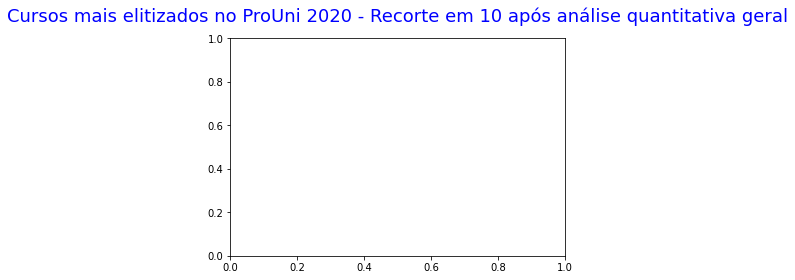

In [ ]:
 # Queremos saber os cursos mais elitizados, então pegamos nossa base de dados e alocamos na variável quando o índice é maior que zero.
 eli = df.loc[df["Índice de elitização"]>0]

 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Usa se o head para pegar os dez resultados mais significativos
 Cursos_elitizados = pd.DataFrame([eli.curso_busca.value_counts().head(10)]).melt()
 Cursos_elitizados.plot(kind='barh', ax=ax, x ='variable')
 plt.title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1.05, fontsize=18, color="blue")
 plt.show()


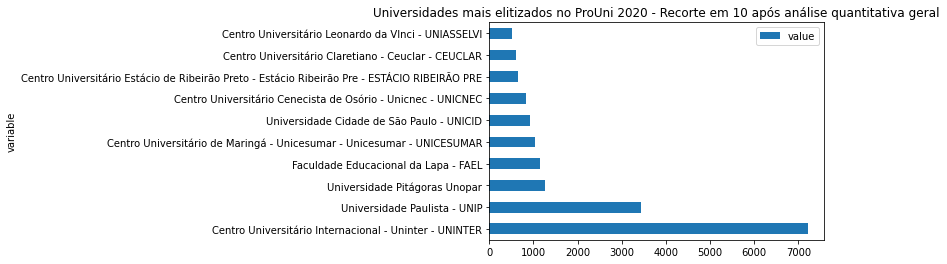

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que há repetição de Universidade.
 # Usa se o head para pegar os dez resultados mais significativos
 Universidades_elitizadas = pd.DataFrame([eli.universidade_nome.value_counts().head(10)]).melt()
 Universidades_elitizadas.plot(kind='barh', x ='variable')
 plt.savefig('output.png')

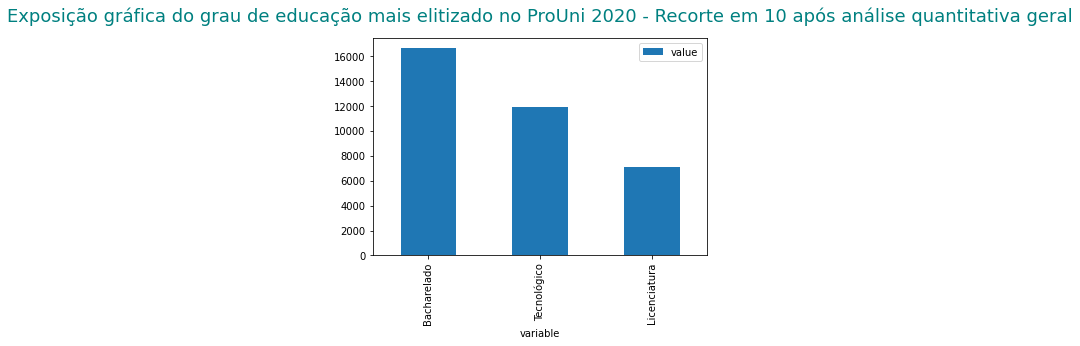

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o Grau.
 # Usa se o head para pegar os dez resultados mais significativos
 Grau_elitizado = pd.DataFrame([eli.grau.value_counts().head(10)]).melt()
 (Grau_elitizado.plot(kind='bar', x ='variable'))
 plt.title('Exposição gráfica do grau de educação mais elitizado no ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

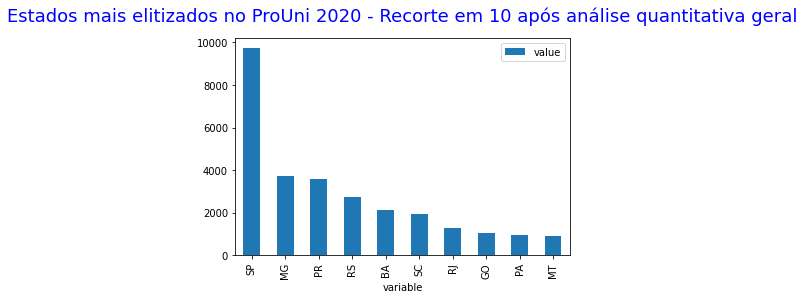

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o Estado.
 # Usa se o head para pegar os dez resultados mais significativos
 Uf_elitizado = pd.DataFrame([eli.uf_busca.value_counts().head(10)]).melt()
 (Uf_elitizado.plot(kind='bar', x ='variable'))
 plt.title('Estados mais elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

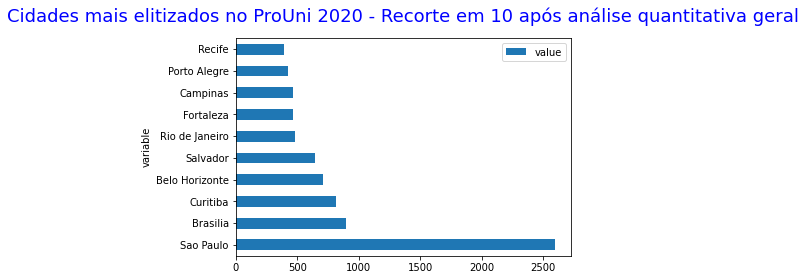

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete a Cidade.
 # Usa se o head para pegar os dez resultados mais significativos
 Cidade_elitizado = pd.DataFrame([eli.cidade_busca.value_counts().head(10)]).melt()
 (Cidade_elitizado.plot(kind='barh', x ='variable'))
 plt.title('Cidades mais elitizadas no ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

# Cursos não elitizados

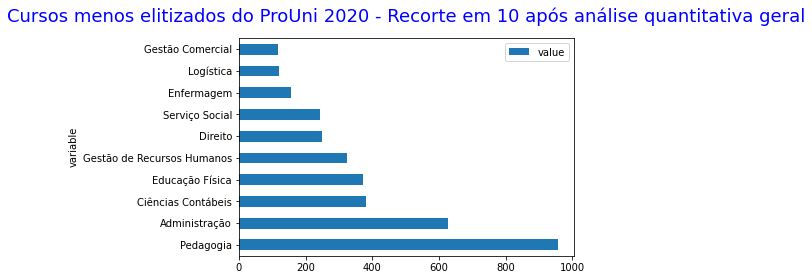

In [ ]:
 # Agora queremos saber os cursos não elitizados, então pegamos nossa base de dados e alocamos na variável quando o índice é menor que zero.
 neli = df.loc[df["Índice de elitização"]<=0]

  # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Usa se o head para pegar os dez resultados mais significativos
 Cursos_elitizados = pd.DataFrame([neli.curso_busca.value_counts().head(10)]).melt()
 Cursos_elitizados.plot(kind='barh', x ='variable')
 plt.title('Cursos menos elitizados do ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

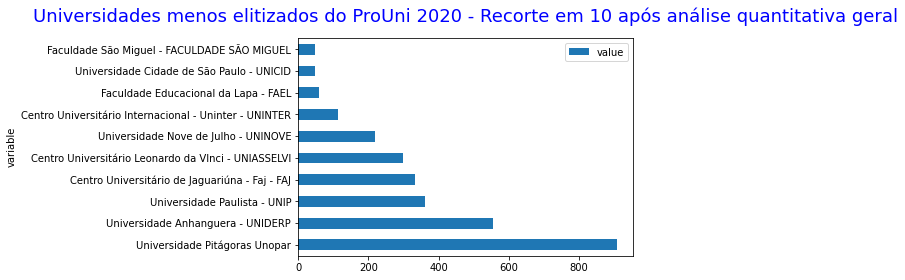

In [ ]:
 #Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que há repetição de Universidade.
 # Usa se o head para pegar os dez resultados mais significativos
 Universidades_nelitizadas = pd.DataFrame([neli.universidade_nome.value_counts().head(10)]).melt()
 Universidades_nelitizadas.plot(kind='barh', x ='variable')
 plt.title('Universidades menos elitizados do ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

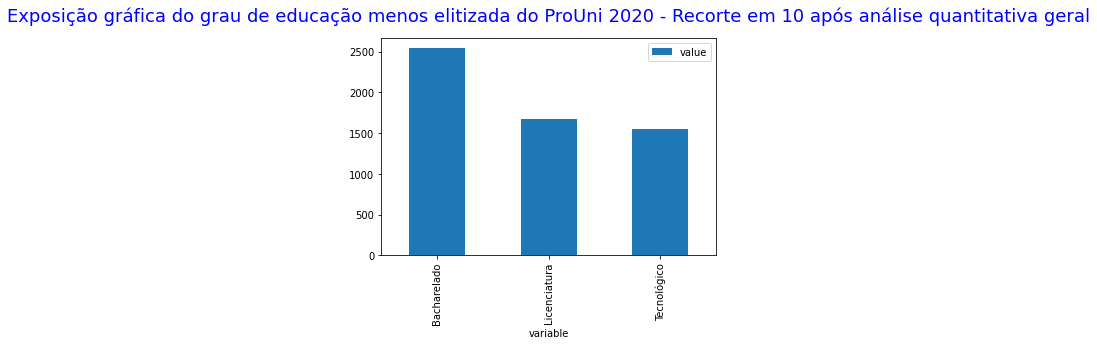

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o Grau.
 # Usa se o head para pegar os dez resultados mais significativos
 Grau_nelitizado = pd.DataFrame([neli.grau.value_counts().head(10)]).melt()
 (Grau_nelitizado.plot(kind='bar', x ='variable'))
 plt.title('Exposição gráfica do grau de educação menos elitizada do ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

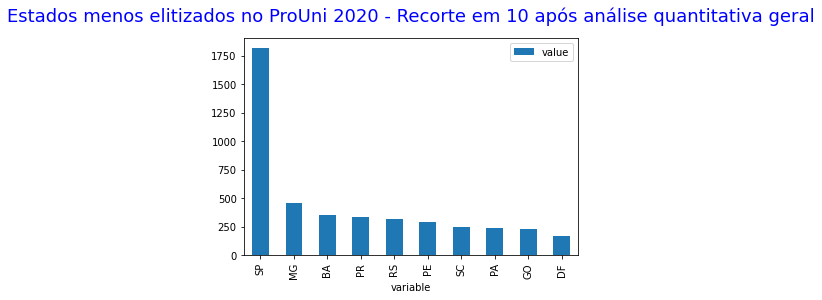

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o Estado.
 # Usa se o head para pegar os dez resultados mais significativos
 Uf_nelitizado = pd.DataFrame([neli.uf_busca.value_counts().head(10)]).melt()
 (Uf_nelitizado.plot(kind='bar', x ='variable'))
 plt.title('Estados menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

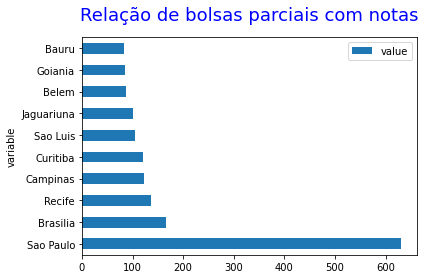

In [ ]:
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete a Cidade.
 # Usa se o head para pegar os dez resultados mais significativos
 Cidade_nelitizado = pd.DataFrame([neli.cidade_busca.value_counts().head(10)]).melt()
 (Cidade_nelitizado.plot(kind='barh', x ='variable',  title = "Cidades menos elitizados no ProUni 2020 - Recorte em 10 após análise quantitativa geral"))
 
 plt.title('Relação de bolsas parciais com notas', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

# Arroz com feijão mas em grafico

> Indented block

> Indented block





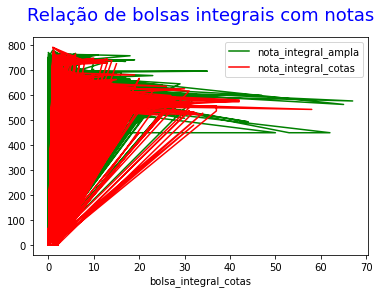

In [ ]:
 ax = plt.gca()
 # plotando a relação de bolsas integrais com notas ampla (VERDE)
 df.plot(kind='line',x='bolsa_integral_ampla',y='nota_integral_ampla', color='green',ax=ax)
 # plotando a relação de bolsas integrais com nota para cotistas (VERMELHO)
 df.plot(kind='line',x='bolsa_integral_cotas',y='nota_integral_cotas', color='red',ax=ax)
 plt.title('Relação de bolsas integrais com notas', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

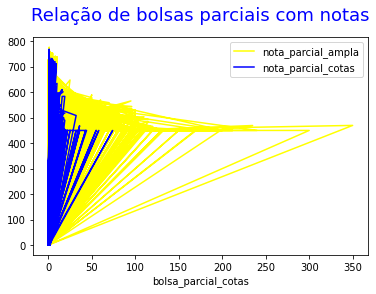

In [ ]:
 ax = plt.gca()
 # plotando a relação de bolsas parciais com para ampla (AMARELO)
 df.plot(kind='line',x='bolsa_parcial_ampla',y='nota_parcial_ampla', color='yellow',ax=ax, title="Relação de bolsas parciais com notas - Ampla concorrência")
 # plotando a relação de bolsas parciais com notas para cotistas (AZUL)
 df.plot(kind='line',x='bolsa_parcial_cotas',y='nota_parcial_cotas', color='blue',ax=ax,)
 plt.title('Relação de bolsas parciais com notas', y=1.05, fontsize=18, color="blue")
 plt.savefig('output.png')

# Cursos

> Indented block



Text(0.5, 1.05, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em 500')

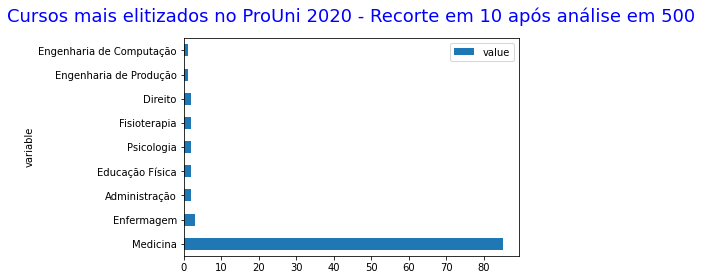

In [ ]:
 # Pegando a base de dados e recortando os cem cursos do topo.
 # A tabela está organizada por índice de elitização
ds100 = ds.head(100)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
Cursos100 = pd.DataFrame([ds100.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico dos cem cursos mais elitizados.
Cursos100.plot(kind='barh', x ='variable')
plt.title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em 500', y=1.05, fontsize=18, color="blue")

Text(0.5, 1.05, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em 500')

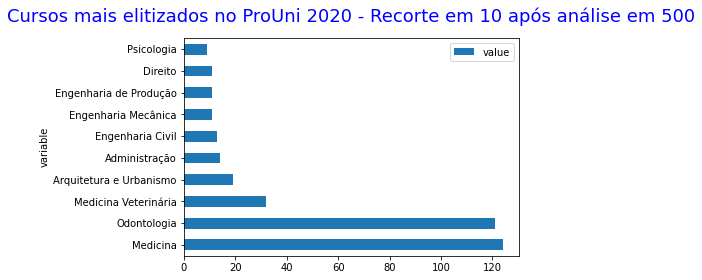

In [ ]:
 # Pegando a base de dados e recortando os quinhentos cursos do topo.
 # A tabela está organizada por índice de elitização
 ds500 = ds.head(500)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos500 = pd.DataFrame([ds500.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico dos quinhentos cursos mais elitizados.
 Cursos500.plot(kind='barh', x ='variable')
 plt.title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em 500', y=1.05, fontsize=18, color="blue")


Text(0.5, 1.05, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em mil')

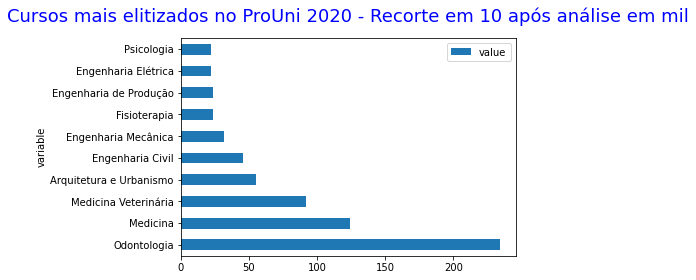

In [ ]:
 # Pegando a base de dados e recortando os 100 cursos do topo.
 # A tabela está organizada por índice de elitização
 ds1000 = ds.head(1000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos1000 = pd.DataFrame([ds1000.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico dos mil cursos mais elitizados.
 Cursos1000.plot(kind='barh', x ='variable')
 plt.title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em mil', y=1.05, fontsize=18, color="blue")

Text(0.5, 1.05, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em 10 mil')

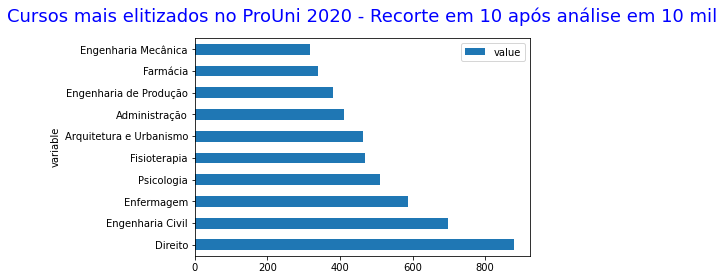

In [ ]:
 # Pegando a base de dados e recortando os 100 cursos do topo.
 # A tabela está organizada por índice de elitização
 ds10000 = ds.head(10000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos10k = pd.DataFrame([ds10000.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico dos dez mil cursos mais elitizados.
 Cursos10k.plot(kind='barh', x ='variable')
 plt.title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em 10 mil', y=1.05, fontsize=18, color="blue")

Text(0.5, 1.05, 'Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em 20 mil')

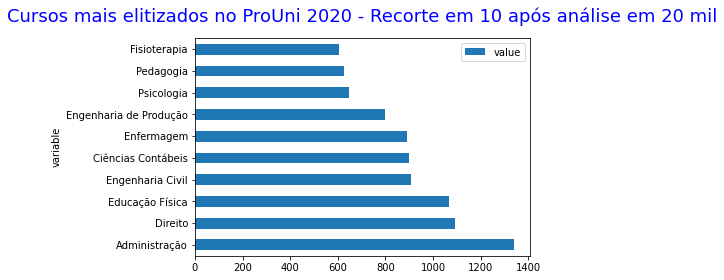

In [ ]:
 # Pegando a base de dados e recortando os 100 cursos do topo.
 # A tabela está organizada por índice de elitização
 ds20000 = ds.head(20000)
 # Definindo uma variável que aloca um dataframe. É aplicada a função count para contar o número de vezes em que se repete o CURSO.
 # Melt é utilizado para transformar os dados para o tipo key-value, similar a um banco de dados não relacional.
 Cursos20k = pd.DataFrame([ds20000.curso_busca.value_counts().head(10)]).melt()
 # Plota-se o gráfico dos dez mil cursos mais elitizados.
 Cursos20k.plot(kind='barh', x ='variable')
 plt.title('Cursos mais elitizados no ProUni 2020 - Recorte em 10 após análise em 20 mil', y=1.05, fontsize=18, color="blue")

# Interativo

In [ ]:
#Definindo entradas para o usuário definir o que quer encontrar
Vrm = float(input("Valor máximo da mensalidade que deseja pagar:\n"))
turno = input("Turno que deseja: \nOpções: Matutino, Vespertino, Noturno, Integral\n")
ufb = input("Estado que deseja cursar:")
#Utilizando loc para filtrar o dataframe
dsm = ds.loc[ds["mensalidade"] <= Vrm]
dsturno = dsm.loc[dsm["turno"]== turno]
dsuf = dsturno.loc[dsturno["uf_busca"]== ufb]
#Mostrando quantas opções eles teriam e o dataframe
print("Número de opções dentro dos pré-requisitos:", dsuf.shape[0])
dsuf

In [128]:
 ds500 = ds.head(500)
 # Pegando a variável do usuário
 Z = input("Digite o nome de um curso e veja se ele está na lista dos 500 mais elitizados! \n (lembre-se de utilizar a primeira letra maiúscula\n")
 #Definindo a variável i para buscar dentro da varíavel ds500 na coluna de cursos
 i = ds500.loc[ds500["curso_busca"]==Z]
 # definindo a quantidade de linhas que aparecerão no input
 l = i.shape[0]
 # se l não tiver linhas vamos mostrar que não tem
if l == 0:
  print("Não têm")
 # se 
else:
    print("Têm")

Digite o nome de um curso e veja se ele está na lista dos 500 mais elitizados! 
 (lembre-se de utilizar a primeira letra maiúscula
Medicina
Têm
